In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
experiment_name = 'gaussian'
df = pd.read_csv(f'/home/lclaeys/eigenfunction-solver/experiments/quadratic_energy/{experiment_name}.csv')

In [3]:
metrics = ['eigen_error','orth_error','eigen_cost', 'eigenvalue_mse','eigenfunc_mse']

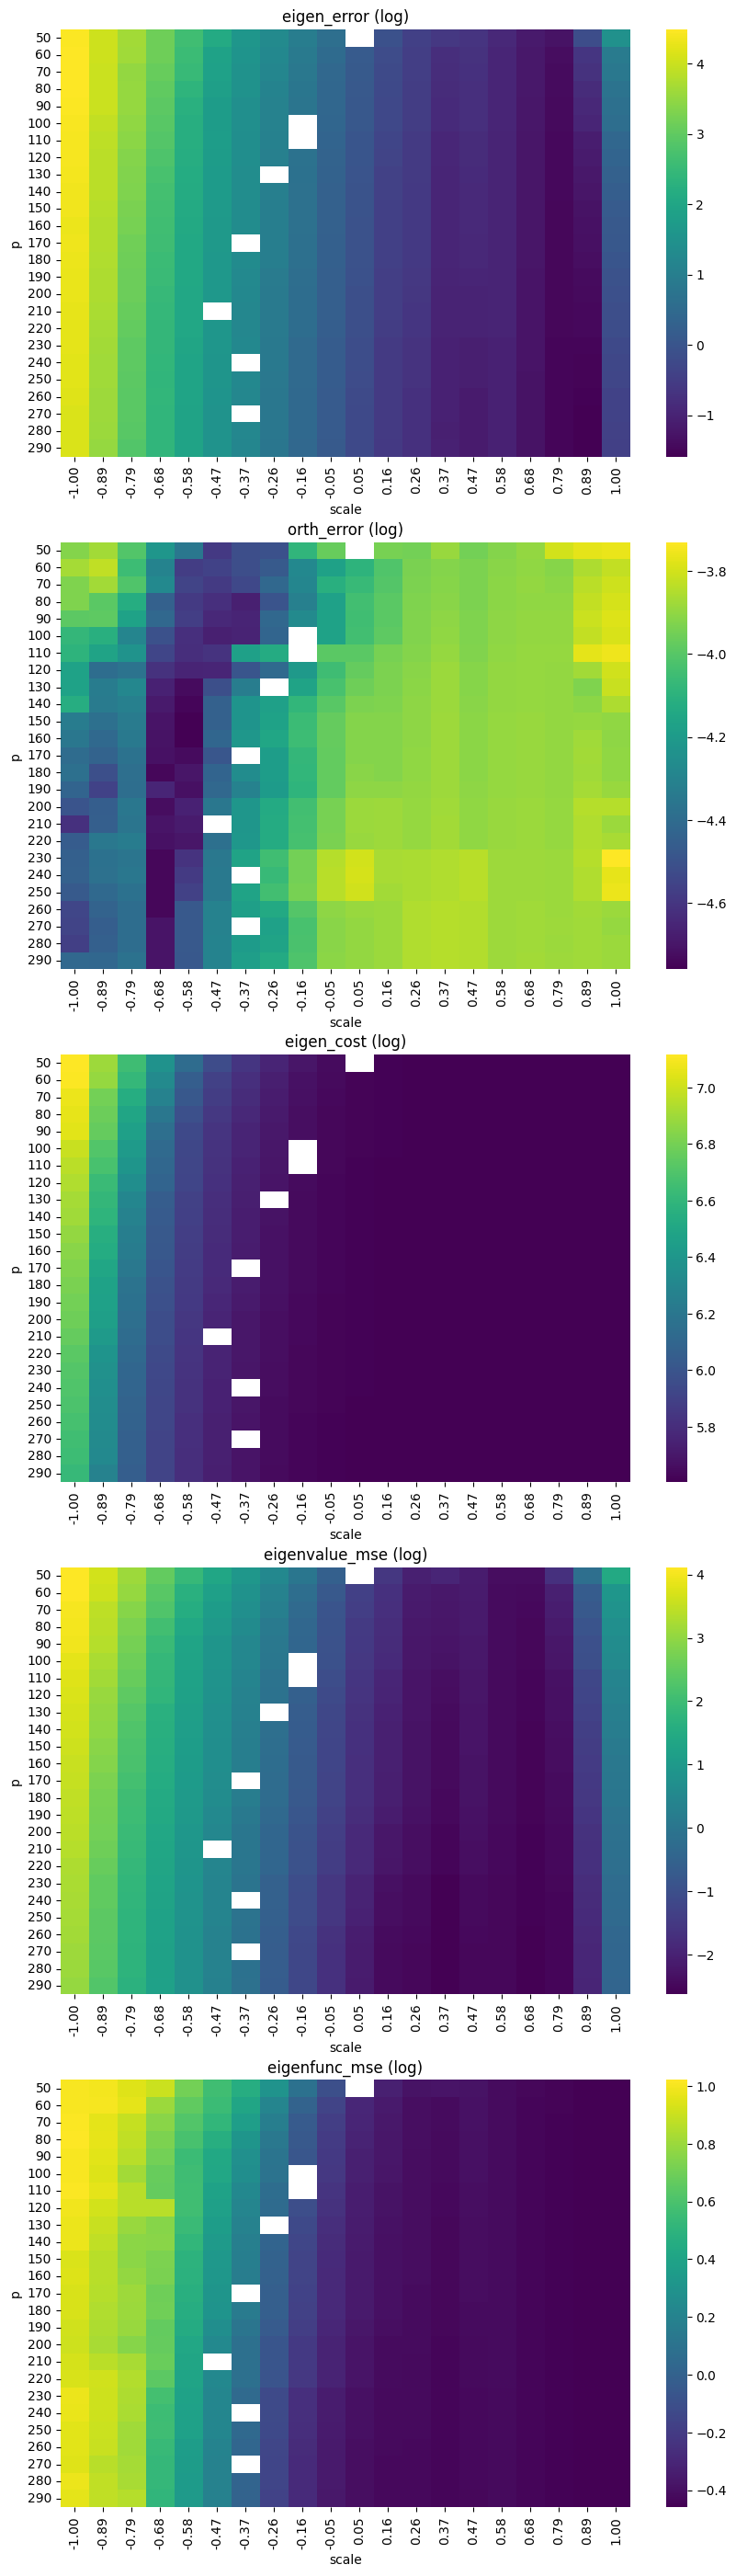

In [4]:
fig, ax = plt.subplots(len(metrics),1,figsize=(10,len(metrics)*7))
for i in range(len(metrics)):
    pivot_table = pd.pivot_table(df, index = 'p', columns = 'scale', values = metrics[i])
    pivot_table.index = pivot_table.index.map(lambda x: f"{int(x)}")
    pivot_table.columns = pivot_table.columns.map(lambda x: f"{np.log10(x):.2f}") 
    sns.heatmap(np.log10(pivot_table), cmap='viridis',ax=ax[i])
    ax[i].set_title(f'{metrics[i]} (log)')


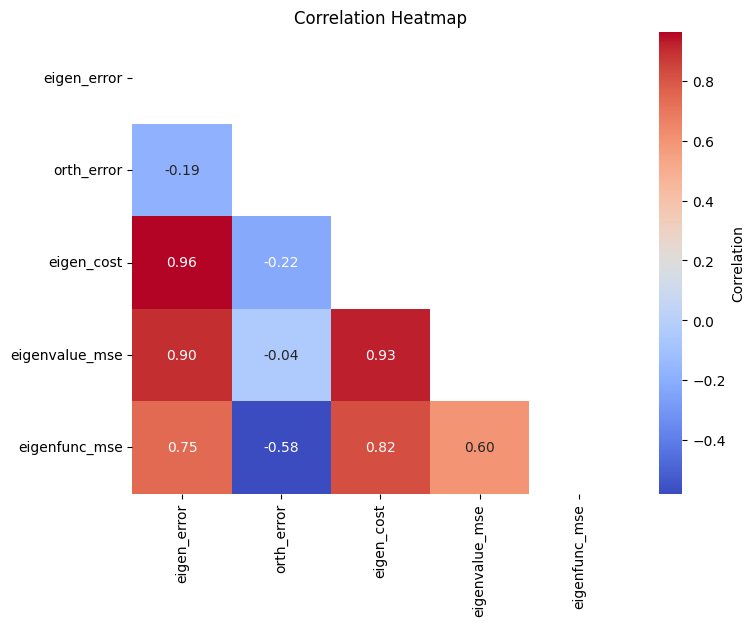

In [10]:
corr = df.loc[:,metrics].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
corr = corr.mask(mask)

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Correlation'})
plt.title('Correlation Heatmap')
plt.show()

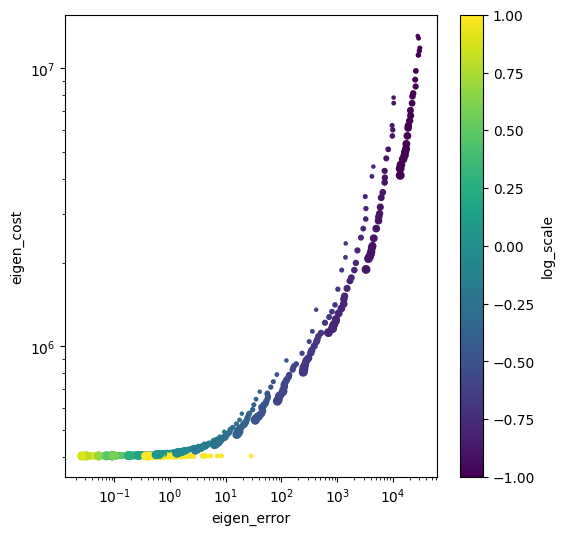

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
df['log_scale'] = np.log10(df['scale'])
df['p_size'] = (df['p'] - df['p'].min())/(df['p'].max()-df['p'].min())*5
df.plot.scatter(x='eigen_error',y='eigen_cost',ax=ax,c='log_scale',s='p/10')

ax.set_xscale('log')
ax.set_yscale('log')

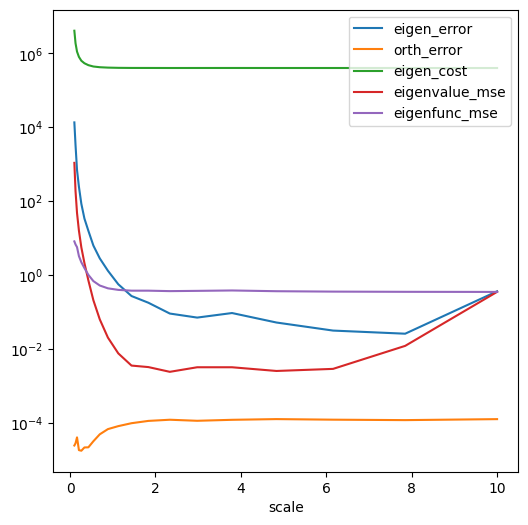

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
df.groupby('scale')[metrics].min().sort_index().plot(ax=ax)
ax.set_yscale('log')